<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
from collections import defaultdict

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = './data/'

In [3]:
def to_csr(X):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in X:
        for term in d:
            index = term
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)[:, 1:]

In [4]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    
    freqs = pickle.load(open(site_freq_path, "rb"))
            
    allFiles = glob(path_to_csv_files + "/*.csv")
    df_list = []
    userId = 1
    
    for file in allFiles:
        basename = os.path.basename(file)
        user = int(basename[4:-4])
        df = pd.read_csv(file)
        df_list.append((user, df))
    
    columns = ["site" + str(x) for x in range(1, session_length + 1)]
    columns.append("user_id")
    resultDF = pd.DataFrame(columns=columns)
    
    tmpArray = []
    
    userId = 0
    
    def queue_to_dict(queue, user_id):
        result = defaultdict(int)
        result["user_id"] = user_id
        for i, site in enumerate(queue, start=1):
            result["site"+str(i)] = site
        return result
        
    
    for userId, df in tqdm(df_list):
        newRow = defaultdict(int)
        newRow["user_id"] = userId
        queue = []
        for row in df.itertuples():
            queue.append(freqs[row.site][0])
            if (len(queue) == session_length):
                tmpArray.append(queue_to_dict(queue, userId))
                queue = queue[window_size:]
        if (len(queue)> 0):
            while len(queue) > 0:
                tmpArray.append(queue_to_dict(queue, userId))
                queue = queue[window_size:]
            
    resultDF = resultDF.append(tmpArray)
    resultDF = resultDF.fillna(0)
    resultDF[resultDF.columns] = resultDF[resultDF.columns].astype(int)
    
    y = resultDF["user_id"]
    resultDF.drop("user_id", axis=1, inplace=True)
    return (to_csr(resultDF.values), y.values)

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [5]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

HBox(children=(IntProgress(value=0, max=3), HTML(value='')))

In [6]:
X_toy_s5_w3.todense()

matrix([[0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
        [3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
X_toy_s5_w3.todense()

matrix([[0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
        [3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
y_s5_w3

array([2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1])

In [9]:
y_s5_w3

array([2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [10]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'{}users'.format(str(num_users))), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_{}users.pkl'.format(str(num_users))),
                                       session_length=session_length, window_size=window_size)
            data_lengths.append(X_sparse.shape[0])
            with open(os.path.join(PATH_TO_DATA, 'X_sparse_{}users_s{}_w{}.pkl'.format(num_users,session_length,window_size)), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 'y_{}users_s{}_w{}.pkl'.format(num_users,session_length,window_size)), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)
            

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))

HBox(children=(IntProgress(value=0, max=150), HTML(value='')))


CPU times: user 46.7 s, sys: 4.62 s, total: 51.3 s
Wall time: 51.2 s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [11]:
''' ВАШ КОД ЗДЕСЬ '''
s = set(data_lengths)
l = len(s)
print(l)

6


## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [12]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [13]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,555,219,219,1387,319,319,319,60,60,266,39
1,15,72,15,319,205,85,107,80,205,2,39
2,67,262,262,205,262,205,205,319,319,205,39
3,80,262,262,6,3,2,937,50,31,34,39
4,676,675,50,34,44,50,17,18,34,50,39


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [15]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [16]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [17]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

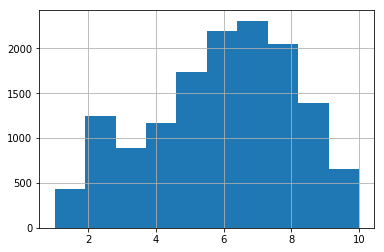

In [18]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

(0.9546933174133301, 0.0)


((array([-3.89403843, -3.6734386 , -3.55253248, ...,  3.55253248,
          3.6734386 ,  3.89403843]), array([ 1,  1,  1, ..., 10, 10, 10])),
 (2.308739910778148, 5.951923760756702, 0.9770787039552067))

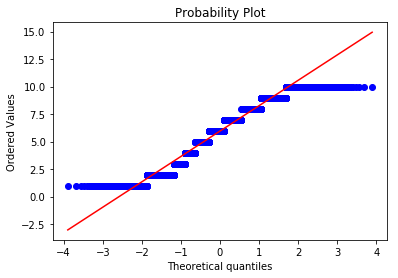

In [19]:
''' ВАШ КОД ЗДЕСЬ '''
print(stats.shapiro(num_unique_sites))


import seaborn as sns
from scipy.stats import norm

stats.probplot(num_unique_sites, dist="norm", plot=plt)

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [20]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [21]:
print(sum(has_two_similar))
print(len(num_unique_sites))
pi_val = stats.binom_test(sum(has_two_similar), len(num_unique_sites), 0.95, alternative='greater')  
print("%.3f" % pi_val)

13410
14061
0.022


**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [25]:
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method='wilson')

In [23]:
wilson_interval = proportion_confint

In [26]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [27]:
site_freqs = pickle.load(open(os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'), "rb"))

In [28]:
# ''' ВАШ КОД ЗДЕСЬ '''
top_sites = {k: v for k, v in site_freqs.items() if v[1] >= 1000}

In [29]:
top_sites

{'accounts.google.com': (10, 2089),
 'accounts.youtube.com': (21, 1057),
 'apis.google.com': (6, 3758),
 'clients1.google.com': (15, 1493),
 'clients6.google.com': (24, 1039),
 'download.jboss.org': (16, 1441),
 'fr-mg42.mail.yahoo.com': (12, 1868),
 'i1.ytimg.com': (19, 1232),
 'mail.google.com': (4, 4158),
 'platform.twitter.com': (22, 1041),
 'plus.google.com': (9, 2630),
 'r1---sn-gxo5uxg-jqbe.googlevideo.com': (8, 3094),
 'r2---sn-gxo5uxg-jqbe.googlevideo.com': (11, 1939),
 'r3---sn-gxo5uxg-jqbe.googlevideo.com': (7, 3244),
 'r4---sn-gxo5uxg-jqbe.googlevideo.com': (14, 1702),
 's-static.ak.facebook.com': (17, 1388),
 's.youtube.com': (1, 8300),
 'safebrowsing-cache.google.com': (23, 1039),
 'static.ak.facebook.com': (18, 1265),
 'translate.google.fr': (25, 1002),
 'twitter.com': (20, 1204),
 'www.facebook.com': (5, 4141),
 'www.google.com': (3, 5441),
 'www.google.fr': (2, 7813),
 'www.youtube.com': (13, 1804)}

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [30]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [31]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [35]:
freqs_only = [v[1] for k,v in site_freqs.items()]
scores = list(map(np.mean, get_bootstrap_samples(np.asarray(freqs_only), len(freqs_only))))
print(stat_intervals(scores, 0.05))

[22.577529   35.77199267]


In [36]:
ft = get_bootstrap_samples(np.asarray(freqs_only), len(freqs_only))
# print(pd.Series(ft[0]).value_counts())
# print(pd.Series(ft[1]).value_counts())
# print(ft[1].value_counts())

In [37]:
list(site_freqs)

['download.jboss.org',
 'www.google.com',
 'api.twitter.com',
 'www.facebook.com',
 'www.google.fr',
 'media.melty.fr',
 'clients1.google.com',
 'fr.openclassrooms.com',
 'www.melty.fr',
 'safebrowsing-cache.google.com',
 'docs.oracle.com',
 'plus.google.com',
 's-static.ak.facebook.com',
 'bay178.mail.live.com',
 'static.ak.facebook.com',
 'apis.google.com',
 'download.oracle.com',
 'safebrowsing.clients.google.com',
 'platform.twitter.com',
 'drive.google.com',
 'doug1izaerwt3.cloudfront.net',
 'accounts.google.com',
 'login.live.com',
 'ocsp.digicert.com',
 'repo.maven.apache.org',
 'skydrive.live.com',
 'syndication.twitter.com',
 'ajax.googleapis.com',
 'translate.google.com',
 'ocsp.verisign.com',
 'connect.facebook.net',
 'twitter.com',
 'ad.melty.fr',
 'gtssl-ocsp.geotrust.com',
 'h.live.com',
 'mail.google.com',
 'gtglobal-ocsp.geotrust.com',
 'full-stream.net',
 'www.developpez.net',
 'javadl-esd-secure.oracle.com',
 'ocsp.thawte.com',
 'docs.google.com',
 'www.oracle.com',
 

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.